### 1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd
df_flight = pd.read_excel('flight_price.xlsx')
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
df_flight.shape

(10683, 11)

In [3]:
num_rows, num_cols = df_flight.shape
print(f'Number of rows in flight dataset is : {num_rows}')
print(f'Number of columns in flight dataset is : {num_cols}')

Number of rows in flight dataset is : 10683
Number of columns in flight dataset is : 11


### 2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution. 

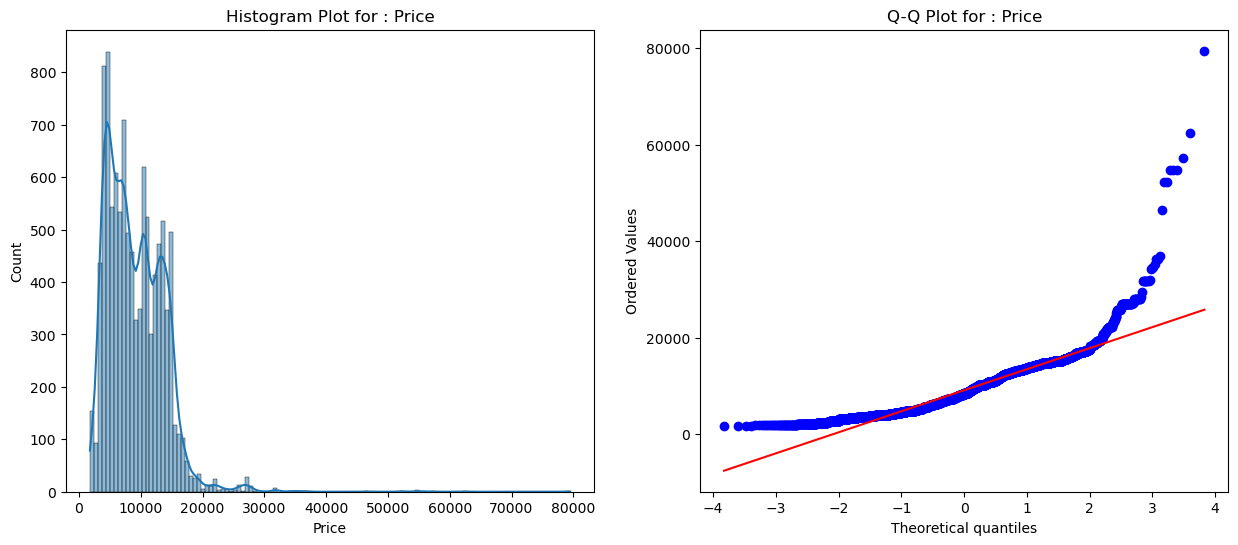

In [4]:
import scipy.stats as stat
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
def qq_plot(df, feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.title(f'Histogram Plot for : {feature}')
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(f'Q-Q Plot for : {feature}')
    plt.show()
qq_plot(df_flight,'Price')

Histogram shows that Price is Right  Skewed

### 3.What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
max_price = df_flight['Price'].max()
min_price = df_flight['Price'].min()
range_price = max_price - min_price

print(f'Range of price is : {range_price}')
print(f'Maximum Price of Flight is : {max_price}')
print(f'Minimum Price of Flight is : {min_price}')

Range of price is : 77753
Maximum Price of Flight is : 79512
Minimum Price of Flight is : 1759


In [6]:
df_flight[['Price']].describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### 4.How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

In [7]:
df_flight.groupby(by='Airline').describe()

Price                              \
                                    count          mean           std   
Airline                                                                 
Air Asia                            319.0   5590.260188   2027.362290   
Air India                          1752.0   9611.210616   3900.952942   
GoAir                               194.0   5861.056701   2703.585767   
IndiGo                             2053.0   5673.682903   2264.142168   
Jet Airways                        3849.0  11643.923357   4258.940578   
Jet Airways Business                  6.0  58358.666667  11667.596748   
Multiple carriers                  1196.0  10902.678094   3721.234997   
Multiple carriers Premium economy    13.0  11418.846154   1717.153936   
SpiceJet                            818.0   4338.284841   1849.922514   
Trujet                                1.0   4140.000000           NaN   
Vistara                             479.0   7796.348643   2914.298578   
Vistara Premium economy               3.0   8962.333333   2915.405518   

                                                                        \
                                       min      25%      50%       75%   
Airline                                                                  
Air Asia                            3383.0   4282.0   5162.0   6451.00   
Air India                           2050.0   6896.0   9443.0  12219.00   
GoAir                               3398.0   3898.0   5135.0   6811.25   
IndiGo                              2227.0   4226.0   5000.0   6494.00   
Jet Airways                         1840.0   9134.0  11467.0  14151.00   
Jet Airways Business               46490.0  52243.0  54747.0  61122.50   
Multiple carriers                   5797.0   7723.0  10197.0  13587.00   
Multiple carriers Premium economy   9845.0  10161.0  11269.0  11269.00   
SpiceJet                            1759.0   3574.5   3873.0   4760.00   
Trujet                              4140.0   4140.0   4140.0   4140.00   
Vistara                             3687.0   5403.0   7980.0   9345.00   
Vistara Premium economy             5969.0   7547.0   9125.0  10459.00   

                                            
                                       max  
Airline                                     
Air Asia                           13774.0  
Air India                          31945.0  
GoAir                              22794.0  
IndiGo                             22153.0  
Jet Airways                        54826.0  
Jet Airways Business               79512.0  
Multiple carriers                  36983.0  
Multiple carriers Premium economy  14629.0  
SpiceJet                           23267.0  
Trujet                              4140.0  
Vistara                            21730.0  
Vistara Premium economy            11793.0

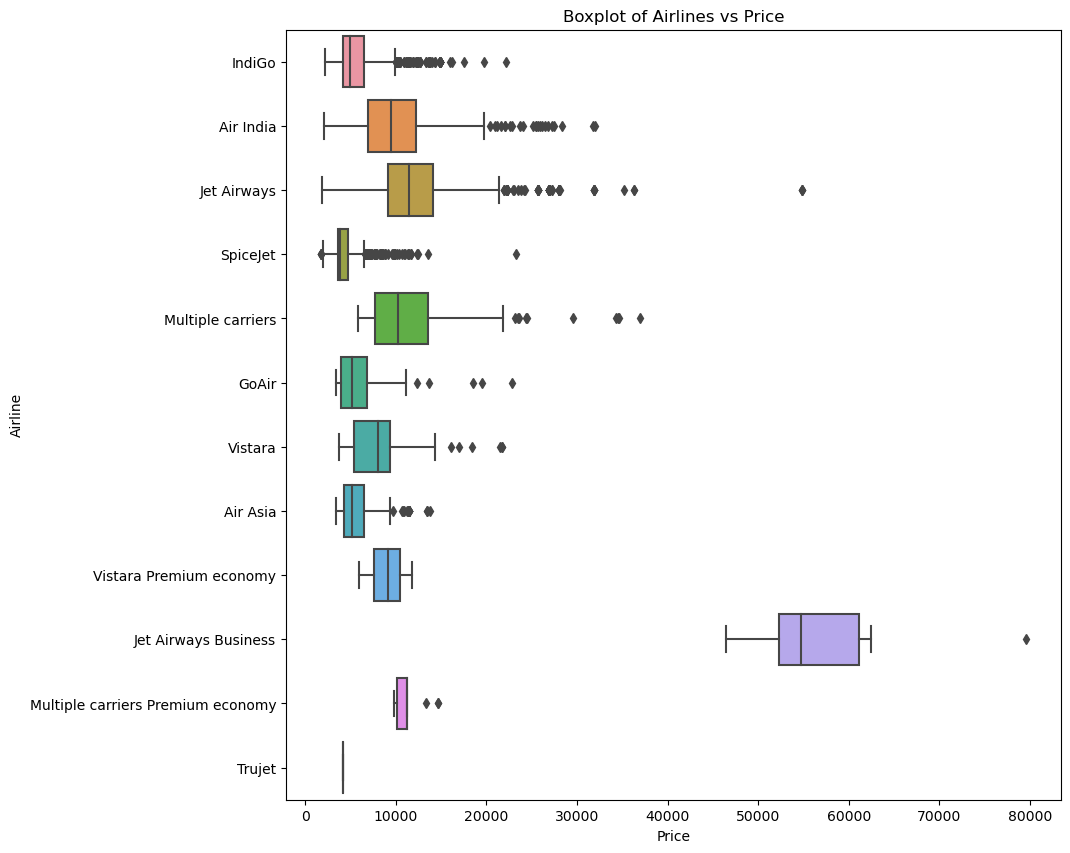

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxplot(data=df_flight, x='Price', y='Airline')
plt.title('Boxplot of Airlines vs Price')
plt.show()

### 5.Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

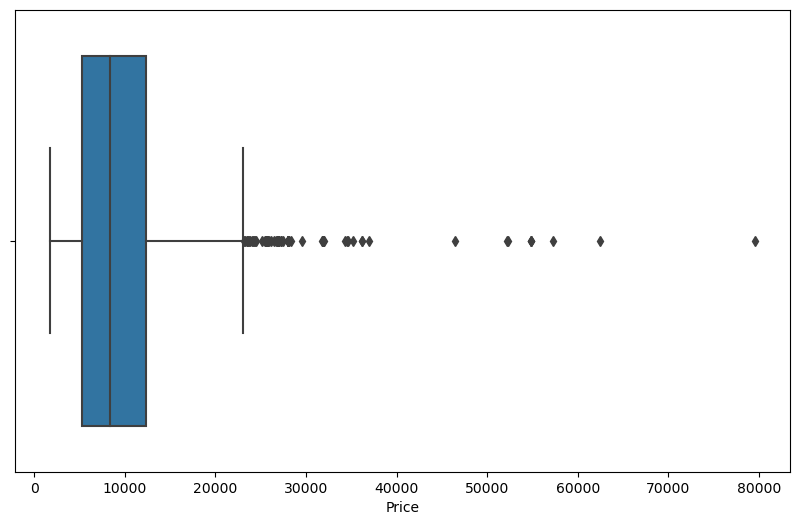

In [9]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df_flight,x='Price')
plt.show()

In [10]:
import numpy as np
from scipy.stats import iqr

q1, q3 = np.percentile(df_flight['Price'], [25, 75])
iqr_value = iqr(df_flight['Price'])

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr_value)
print("Lower Box :",q1-1.5*iqr_value)
print("Upper Box :",q3 + 1.5*iqr_value)
print("Max Price :",df_flight['Price'].max())
print("Min Price :",df_flight['Price'].min())

Q1: 5277.0
Q3: 12373.0
IQR: 7096.0
Lower Box : -5367.0
Upper Box : 23017.0
Max Price : 79512
Min Price : 1759


In [11]:
df_flight[df_flight.Price > q3 + 1.5*iqr_value]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


There are 94 outliers in this dataset

If there are any potential outliers in the flight price dataset, they will be displayed as individual points outside the whiskers of the boxplot. These outliers may represent extreme values or errors in the dataset, and they can have a significant impact on the analysis if not handled appropriately.

If an outlier is a valid data point, it may represent a rare event or a significant variation from the typical values in the dataset. In this case, it may be valuable to investigate the outlier further and determine if it should be included or excluded from the analysis.

On the other hand, if an outlier is an error or an invalid data point, it should be removed from the dataset before analysis to avoid skewing the results. In this case, it is essential to determine the cause of the outlier and take steps to prevent similar errors from occurring in the future.

In conclusion, identifying and interpreting potential outliers in a dataset using a boxplot is an important step in data analysis, as outliers can have a significant impact on the results. It is essential to investigate any outliers further and determine if they should be included or excluded from the analysis based on their validity and relevance to the research question.

### 6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

To identify the peak travel season using the Flight Price dataset, there are several features that could be analyzed. Here are some potential features:
Month of the year: Analyzing the average flight prices for each month can reveal any seasonal patterns in travel demand. This analysis can help to identify the months with the highest and lowest flight prices.

1.Day of the week: Analyzing the average flight prices for each day of the week can reveal any patterns in travel demand based on the day of the week. This analysis can help to identify the days with the highest and lowest flight prices.

2.Destination: Analyzing the average flight prices for each destination can reveal any seasonal patterns in travel demand for specific locations. This analysis can help to identify the destinations with the highest and lowest flight prices.

3.Departure city: Analyzing the average flight prices for each departure city can reveal any seasonal patterns in travel demand for specific locations. This analysis can help to identify the departure cities with the highest and lowest flight prices.

In [12]:
from warnings import filterwarnings
filterwarnings('ignore')

df_flight['Date_of_Journey']=pd.to_datetime(df_flight['Date_of_Journey'])
df_flight['Date'] = df_flight['Date_of_Journey'].dt.day
df_flight['Month'] = df_flight['Date_of_Journey'].dt.month
df_flight['Year'] = df_flight['Date_of_Journey'].dt.year
df_flight['Day'] = df_flight['Date_of_Journey'].dt.day_name()

df_flight.groupby(by='Month').mean()['Price'].sort_values()

Month
4      5230.860849
3      8433.839891
12     9110.774295
6      9214.964905
5      9361.077628
9      9551.474395
1     10492.642791
Name: Price, dtype: float64

<AxesSubplot: xlabel='Month'>

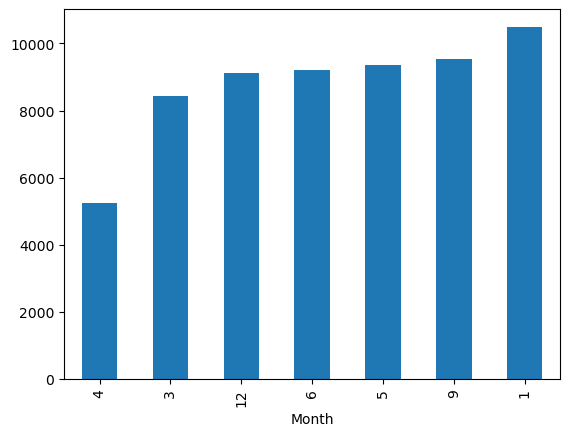

In [13]:
df_flight.groupby(by='Month').mean()['Price'].sort_values().plot(kind='bar')

In [14]:
df_flight.groupby(by='Day').mean()['Price'].sort_values()

Day
Wednesday    7996.290807
Friday       8556.502220
Saturday     8894.375727
Tuesday      8960.452265
Sunday       9556.827684
Monday       9721.101945
Thursday     9805.088646
Name: Price, dtype: float64

<AxesSubplot: xlabel='Day'>

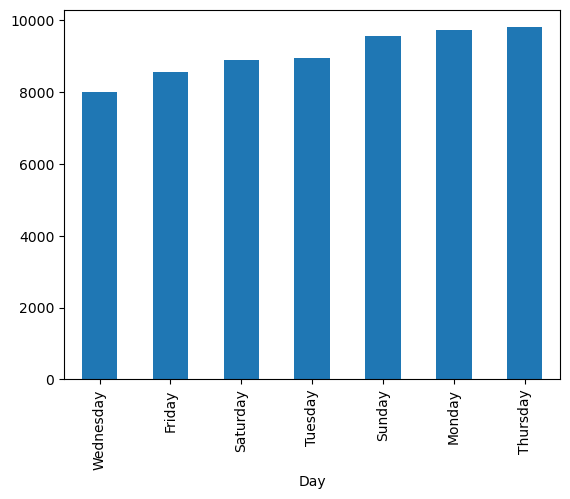

In [15]:
df_flight.groupby(by='Day').mean()['Price'].sort_values().plot(kind='bar')

In [16]:
df_flight.groupby(by='Destination').mean()['Price'].sort_values()

Destination
Kolkata       4789.892388
Hyderabad     5059.708752
Delhi         5143.918577
Banglore      9158.389411
Cochin       10539.439057
New Delhi    11917.716738
Name: Price, dtype: float64

<AxesSubplot: xlabel='Destination'>

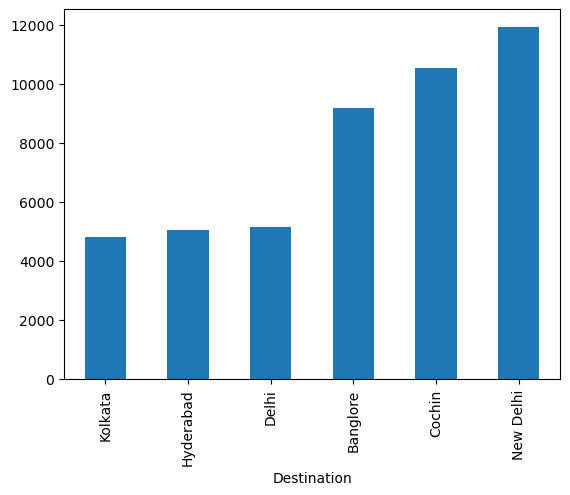

In [17]:
df_flight.groupby(by='Destination').mean()['Price'].sort_values().plot(kind='bar')

In [18]:
df_flight.groupby(by='Source').mean()['Price'].sort_values()

Source
Chennai      4789.892388
Mumbai       5059.708752
Banglore     8017.464269
Kolkata      9158.389411
Delhi       10539.439057
Name: Price, dtype: float64

<AxesSubplot: xlabel='Source'>

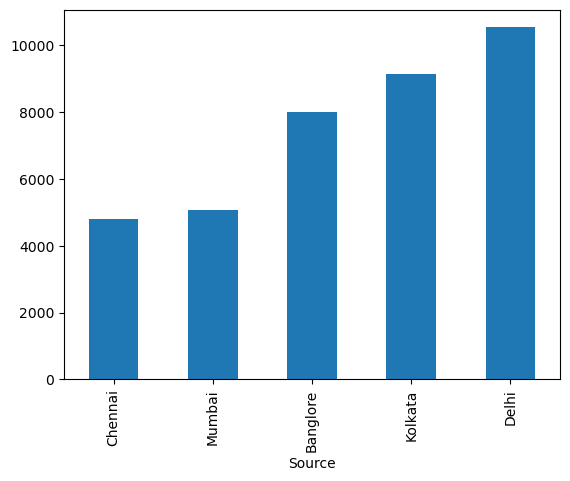

In [19]:
df_flight.groupby(by='Source').mean()['Price'].sort_values().plot(kind='bar')

#### Insights :

1.Cheapest Price is in Month of April with average price of 5230.86

2.Cheapest Prices are usually with flights departing on Wednesday at average price of 7996.29

3.Cheapest Flight destination is Kolkata with average price of 4789.89

4.Cheapest Flights are starting from city Chennai with average price of 4789.89

### 7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

To identify trends in flight prices, I would start by analyzing the following features in the Flight Price dataset:

1.Time-related features: These would include date of booking, date of travel, and time of day of travel. By analyzing these features, we can identify whether flight prices tend to be higher or lower during certain times of the year, or certain times of the day.

2.Route-related features: These would include the origin and destination cities of the flights, as well as any stopovers or layovers. By analyzing these features, we can identify whether flight prices tend to be higher or lower for certain routes, or for flights with specific stopover locations.

3.Airline-related features: These would include the airline carrier for each flight. By analyzing these features, we can identify whether certain airlines tend to have higher or lower prices than others.

4.Demand-related features: These would include the number of passengers booked on a flight, as well as the number of seats available. By analyzing these features, we can identify whether flight prices tend to be higher or lower when demand is high or low.

To present my findings to the team, I would use a variety of visualizations. Some examples might include:
Line charts: These could be used to show how flight prices change over time, or how they vary based on the time of day or day of the week.

1.Scatterplots: These could be used to show the relationship between flight prices and variables like the number of passengers or the number of seats available.

2.Bar charts: These could be used to compare flight prices across different airlines or different routes.

3.Heatmaps: These could be used to show which times of year tend to have higher or lower flight prices for different routes.

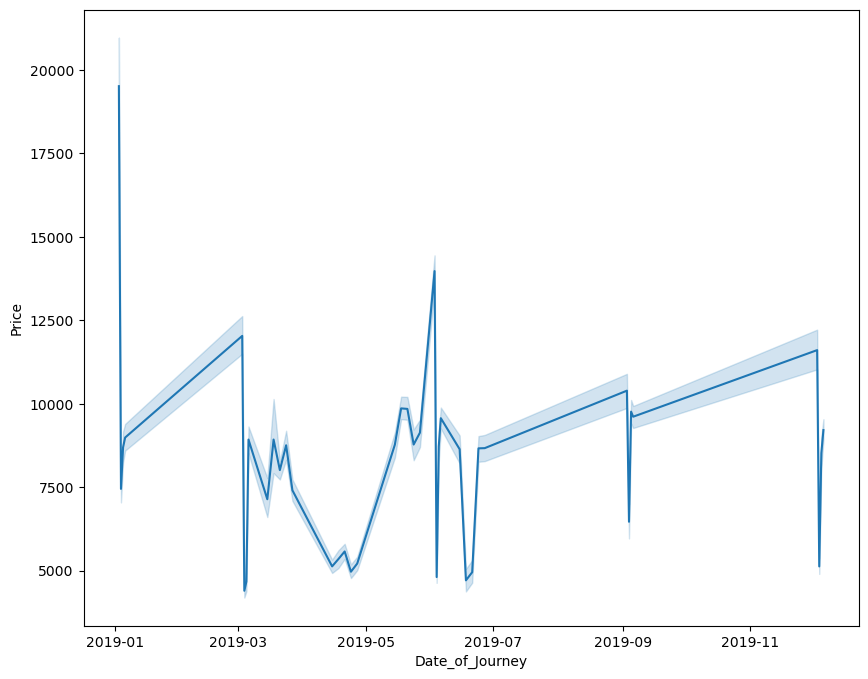

In [20]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.lineplot(data=df_flight, x='Date_of_Journey',y='Price')
plt.show()

In [21]:
df_flight.groupby(by='Airline').mean()['Price'].sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9611.210616
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

<AxesSubplot: xlabel='Airline'>

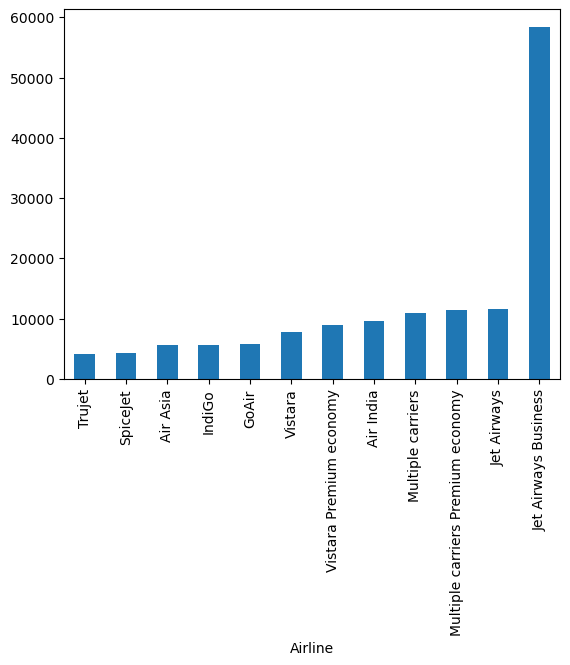

In [22]:
df_flight.groupby(by='Airline').mean()['Price'].sort_values().plot(kind='bar')

Insights : Truejet Flights are cheapest

### 8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

To identify the factors that affect flight prices, I would start by analyzing the following features in the Flight Price dataset:

1.Time-related features: These would include date of booking, date of travel, and time of day of travel. By analyzing these features, we can identify whether flight prices tend to be higher or lower during certain times of the year, or certain times of the day.

2.Route-related features: These would include the origin and destination cities of the flights, as well as any stopovers or layovers. By analyzing these features, we can identify whether flight prices tend to be higher or lower for certain routes, or for flights with specific stopover locations.

3.Airline-related features: These would include the airline carrier for each flight. By analyzing these features, we can identify whether certain airlines tend to have higher or lower prices than others.

4.Demand-related features: These would include the number of passengers booked on a flight, as well as the number of seats available. By analyzing these features, we can identify whether flight prices tend to be higher or lower when demand is high or low.

5.Other factors: There may be other features in the dataset that could affect flight prices, such as the type of aircraft used, the length of the flight, or the class of service.

To present my findings to the management team, I would create a report that includes the following:
Summary statistics: I would provide summary statistics for each feature, including measures of central tendency, variance, and any outliers. This would give the management team a general sense of the distribution of each feature.

1.Visualizations: I would create a variety of visualizations to help illustrate the relationships between different features and flight prices. For example, I might create scatterplots to show the relationship between flight prices and the number of passengers or the number of seats available. I might also create bar charts to compare flight prices across different airlines or different routes.

2.Regression analysis: I would perform regression analysis to identify the factors that have the greatest impact on flight prices. This would allow me to create a predictive model that could be used to estimate flight prices based on different combinations of features.

3.Conclusions and recommendations: Based on my analysis, I would draw conclusions about the factors that have the greatest impact on flight prices and make recommendations to the management team about how they could adjust their pricing strategies to better meet the needs of their customers.

### 9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [23]:
import pandas as pd
df_play=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
num_rows, num_cols = df_play.shape
print(f'Number of rows in playstore dataset is : {num_rows}')
print(f'Number of columns in playstore dataset is : {num_cols}')

Number of rows in playstore dataset is : 10841
Number of columns in playstore dataset is : 13


### 10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [25]:
df_play[df_play.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [26]:
df_play = df_play.drop(index=10472,axis=0)
df_play.groupby(by='Category').describe()

Rating                                                 
                      count      mean       std  min    25%  50%    75%  max
Category                                                                    
ART_AND_DESIGN         62.0  4.358065  0.358297  3.2  4.100  4.4  4.700  5.0
AUTO_AND_VEHICLES      73.0  4.190411  0.543692  2.1  4.000  4.3  4.600  4.9
BEAUTY                 42.0  4.278571  0.362603  3.1  4.000  4.3  4.575  4.9
BOOKS_AND_REFERENCE   178.0  4.346067  0.429046  2.7  4.100  4.5  4.600  5.0
BUSINESS              303.0  4.121452  0.624422  1.0  3.900  4.3  4.500  5.0
COMICS                 58.0  4.155172  0.537758  2.8  3.825  4.4  4.500  5.0
COMMUNICATION         328.0  4.158537  0.426192  1.0  4.000  4.3  4.400  5.0
DATING                195.0  3.970769  0.630510  1.0  3.700  4.1  4.400  5.0
EDUCATION             155.0  4.389032  0.251894  3.5  4.200  4.4  4.600  4.9
ENTERTAINMENT         149.0  4.126174  0.302556  3.0  3.900  4.2  4.300  4.7
EVENTS                 45.0  4.435556  0.419499  2.9  4.200  4.5  4.700  5.0
FAMILY               1747.0  4.192272  0.508026  1.0  4.000  4.3  4.500  5.0
FINANCE               323.0  4.131889  0.642108  1.0  4.000  4.3  4.500  5.0
FOOD_AND_DRINK        109.0  4.166972  0.548070  1.7  4.000  4.3  4.500  5.0
GAME                 1097.0  4.286326  0.365375  1.0  4.100  4.4  4.500  5.0
HEALTH_AND_FITNESS    297.0  4.277104  0.617822  1.4  4.100  4.5  4.600  5.0
HOUSE_AND_HOME         76.0  4.197368  0.368411  2.8  4.000  4.3  4.500  4.8
LIBRARIES_AND_DEMO     65.0  4.178462  0.378522  3.1  4.000  4.2  4.400  5.0
LIFESTYLE             314.0  4.094904  0.693907  1.5  3.800  4.2  4.600  5.0
MAPS_AND_NAVIGATION   124.0  4.051613  0.519926  1.9  3.775  4.2  4.400  4.9
MEDICAL               350.0  4.189143  0.663581  1.0  4.000  4.3  4.600  5.0
NEWS_AND_MAGAZINES    233.0  4.132189  0.536707  1.7  3.900  4.2  4.500  5.0
PARENTING              50.0  4.300000  0.517845  2.0  4.100  4.4  4.675  5.0
PERSONALIZATION       314.0  4.335987  0.352732  2.5  4.200  4.4  4.600  5.0
PHOTOGRAPHY           317.0  4.192114  0.462896  2.0  4.000  4.3  4.500  5.0
PRODUCTIVITY          351.0  4.211396  0.504931  1.0  4.100  4.3  4.500  5.0
SHOPPING              238.0  4.259664  0.404577  1.6  4.100  4.3  4.500  5.0
SOCIAL                259.0  4.255598  0.413809  1.9  4.100  4.3  4.500  5.0
SPORTS                319.0  4.223511  0.427857  1.5  4.100  4.3  4.500  5.0
TOOLS                 734.0  4.047411  0.616143  1.0  3.800  4.2  4.400  5.0
TRAVEL_AND_LOCAL      226.0  4.109292  0.504691  2.2  3.900  4.3  4.400  5.0
VIDEO_PLAYERS         160.0  4.063750  0.551098  1.8  3.800  4.2  4.400  4.9
WEATHER                75.0  4.244000  0.331353  3.3  4.050  4.3  4.500  4.8

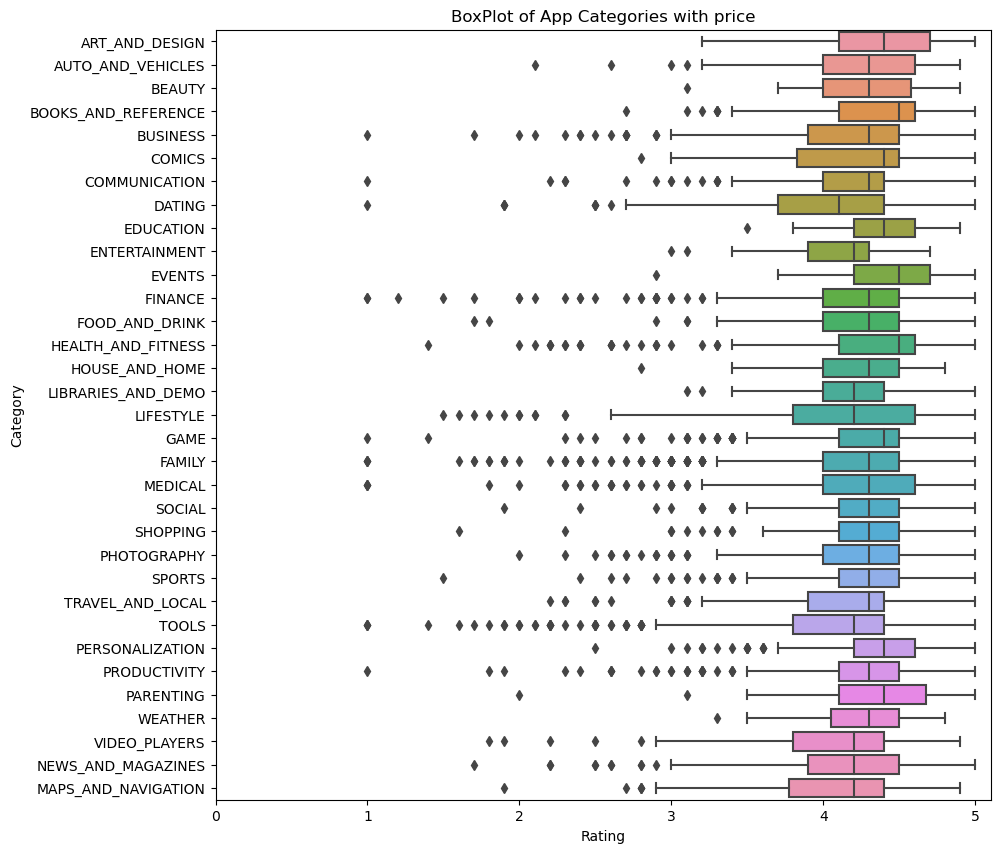

In [27]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(data=df_play,x='Rating',y='Category')
plt.xlim([0,5.1])
plt.title('BoxPlot of App Categories with price')
plt.show()

### 11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [28]:
df_play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Insights :

1.1474 missing values found in Rating

2.1 Missing Value found in Type

3.8 Missing Values found in Current Ver

4.2 Missing Values found in Android Ver

If there are missing values in the dataset, it can affect the accuracy of descriptive statistics, correlations, and predictive models. For example, missing values in the rating column of the Google Playstore dataset may cause the mean rating to be skewed. In addition, if missing values are not handled correctly, it can result in errors during data analysis, such as dropped observations, biased estimates, or distorted results.

Therefore, it is essential to identify missing values in a dataset and develop a strategy for handling them. Some common strategies for handling missing values include removing the rows with missing values, imputing missing values with the mean or median of the column, or using machine learning algorithms that can handle missing values. The choice of strategy depends on the nature and extent of the missing data and the specific research question.

### 12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [29]:
df_play['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [30]:
df_play[df_play.Size=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


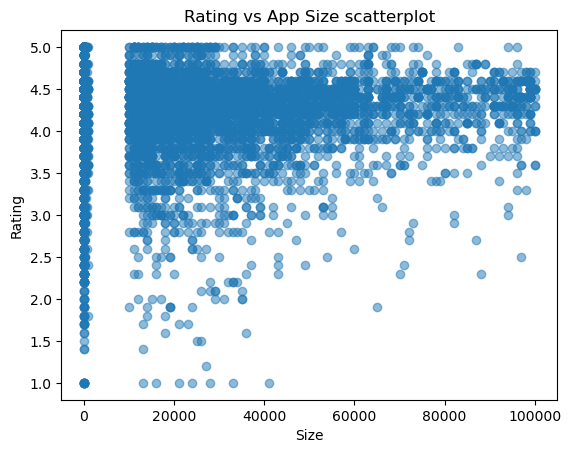

In [31]:
# Convert all units into k
import numpy as np
df_play['Size'] = df_play['Size'].str.replace('M','000')
df_play['Size'] = df_play['Size'].str.replace('k','')
df_play['Size'] = df_play['Size'].replace('Varies with device',np.nan)
df_play['Size'] = df_play['Size'].replace('1,000+','1')
df_play['Size'] = df_play['Size'].astype(float)
import matplotlib.pyplot as plt
plt.scatter(x=df_play['Size'],y=df_play['Rating'], alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('Rating vs App Size scatterplot')
plt.show()

In [32]:
df_play.corr()

,Rating,Size
Rating,1.000000,0.082134
Size,0.082134,1.000000


Insights : There is no relation between ratings and size as correlation is 0 and scatter plot also shows the same

### 13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [33]:
df_play.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [34]:
# Cleaning Price Column
chars_to_remove = ['+',',','$']
columns_to_clean = ['Installs','Price']
for items in chars_to_remove:
    for col in columns_to_clean:
        df_play[col] = df_play[col].str.replace(items,'')   
        
df_play['Price'] = df_play['Price'].astype(float)

df_play.groupby(by='Type').mean()['Price']

Type
Free     0.000000
Paid    13.920837
Name: Price, dtype: float64

<AxesSubplot: title={'center': 'Barchart of app Type vs Average Price'}, xlabel='Type'>

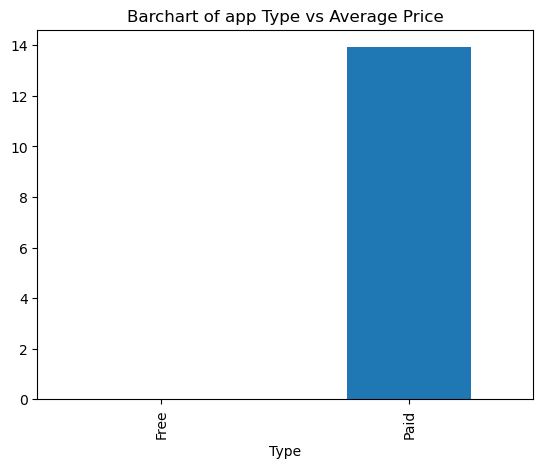

In [35]:
df_play.groupby(by='Type').mean()['Price'].plot(kind='bar',title='Barchart of app Type vs Average Price')

#### Insights:

1.Free apps have 0 average price

2.Paid apps have 13.92 average price

### 14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [36]:
df_play['App'].duplicated().sum()

1181

In [37]:
df_play = df_play.drop_duplicates(subset = ['App'],keep='first')
df_play['Installs']=df_play['Installs'].astype(int)
mx = df_play['Installs'].max()
mx

1000000000

In [38]:
top_10_apps = df_play.sort_values(by=['Installs','Rating'],ascending=False).head(10)[['App','Installs','Rating']]
top_10_apps

,App,Installs,Rating
1654,Subway Surfers,1000000000,4.5
2545,Instagram,1000000000,4.5
2808,Google Photos,1000000000,4.5
336,WhatsApp Messenger,1000000000,4.4
3234,Google,1000000000,4.4
3454,Google Drive,1000000000,4.4
338,Google Chrome: Fast & Secure,1000000000,4.3
340,Gmail,1000000000,4.3
865,Google Play Games,1000000000,4.3
3117,Maps - Navigate & Explore,1000000000,4.3


In [39]:
list(top_10_apps['App'])

['Subway Surfers',
 'Instagram',
 'Google Photos',
 'WhatsApp Messenger',
 'Google',
 'Google Drive',
 'Google Chrome: Fast & Secure',
 'Gmail',
 'Google Play Games',
 'Maps - Navigate & Explore']

### 15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [40]:
df_play['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot: title={'center': 'Value Count of App Categories'}>

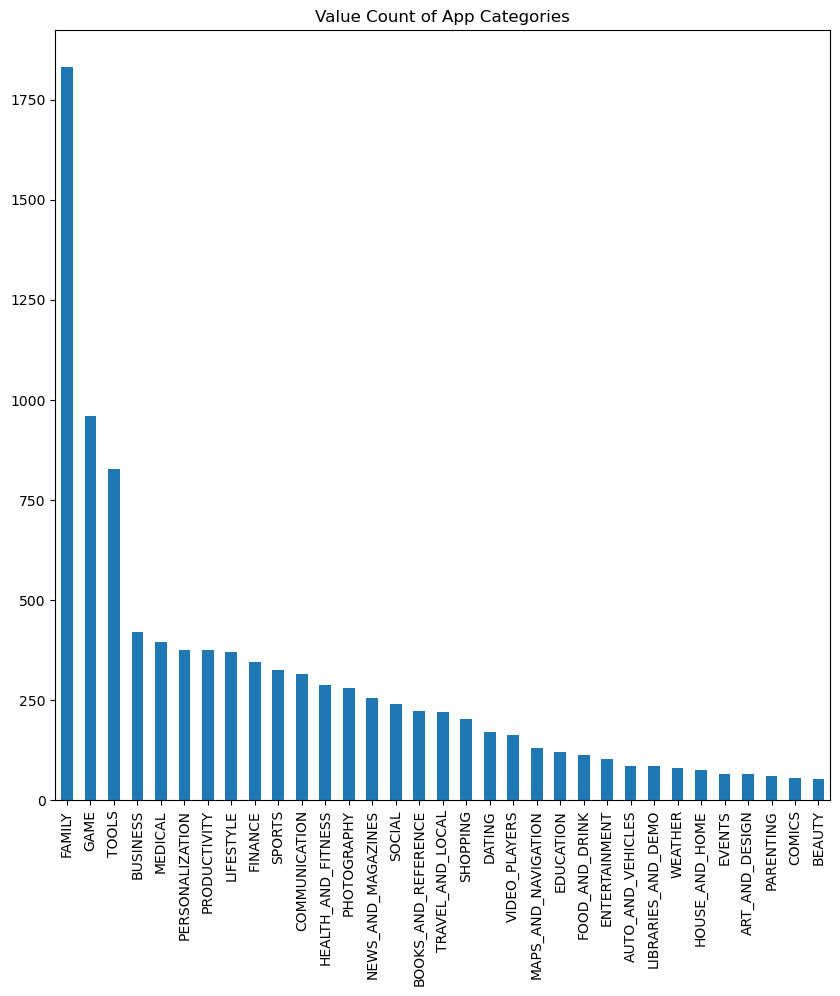

In [41]:
df_play['Category'].value_counts().plot(kind='bar',figsize=(10,10),title='Value Count of App Categories')

In [42]:
df_play.groupby(by='Category').mean()['Rating'].sort_values(ascending=False)

Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
HEALTH_AND_FITNESS     4.243033
SHOPPING               4.230000
SPORTS                 4.216154
AUTO_AND_VEHICLES      4.190411
PRODUCTIVITY           4.183389
COMICS                 4.181481
FAMILY                 4.179664
LIBRARIES_AND_DEMO     4.178125
FOOD_AND_DRINK         4.172340
MEDICAL                4.166552
PHOTOGRAPHY            4.157414
HOUSE_AND_HOME         4.150000
ENTERTAINMENT          4.135294
NEWS_AND_MAGAZINES     4.121569
COMMUNICATION          4.121484
FINANCE                4.115563
BUSINESS               4.098479
LIFESTYLE              4.093355
TRAVEL_AND_LOCAL       4.069519
VIDEO_PLAYERS          4.044595
TOOLS                  4.039554

<AxesSubplot: title={'center': 'Average Review per category'}, xlabel='Category'>

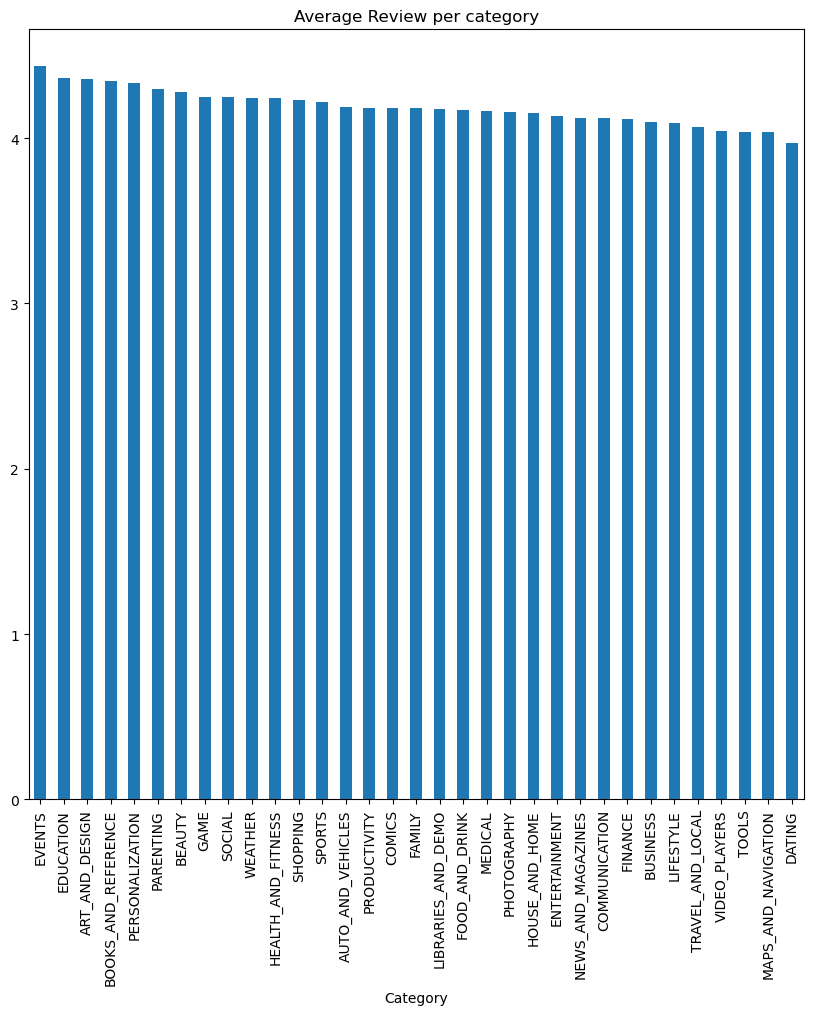

In [43]:
df_play.groupby(by='Category').mean()['Rating'].sort_values(ascending=False).plot(kind='bar',
                                                                                  figsize=(10,10),
                                                                                  title = 'Average Review per category')

In [44]:
df_play.groupby(by='Category').sum()['Installs'].sort_values(ascending=False)

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

<AxesSubplot: title={'center': 'Total Installs per category'}, xlabel='Category'>

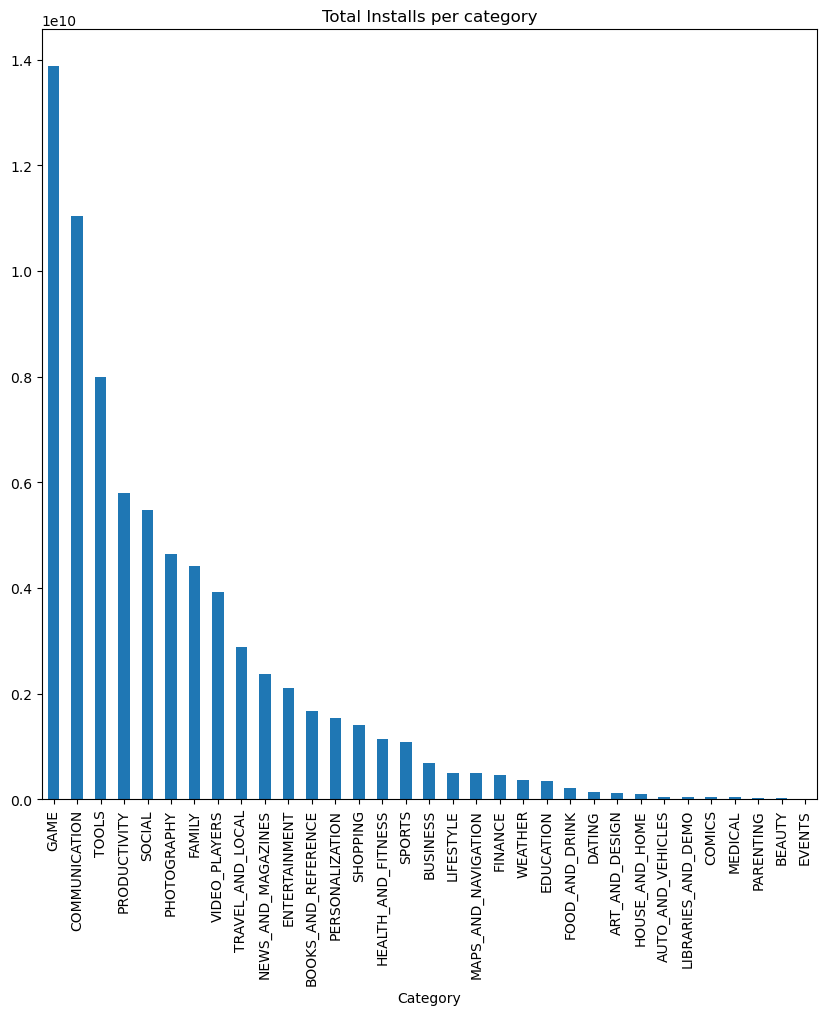

In [45]:
df_play.groupby(by='Category').sum()['Installs'].sort_values(ascending=False).plot(kind='bar',
                                                                                   figsize=(10,10),
                                                                                   title='Total Installs per category')

#### Insight regarding app categories:

Top 3 app Categories with highest value count are : Family, Game, Tools

Top 3 app Categories with highest average rating are : Game, Communication and Tools

Top 3 app Categories with highest installs are : Game, Communication and Tools

### 16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Play Store, we would need to analyze various features such as:

1.Number of downloads: This would indicate how popular an app is among users.

2.Rating: A higher rating indicates that users are satisfied with the app.

3.Reviews: The number of reviews and the sentiment of those reviews could provide insights into user satisfaction and potential areas for improvement.

4.Category: Analyzing the categories in which the apps are listed could help identify the most successful app developers in a specific category.

4.Price: The price of the app could provide insights into the developer's pricing strategy.

5.App size: The size of the app could impact its popularity and the user experience.

To present the findings, we could use various data visualizations such as:
Bar charts and pie charts to represent the number of downloads and rating of the apps.

1.Scatter plots and bubble charts to analyze the correlation between the number of downloads, rating, and price.

2.Heat maps to analyze the distribution of apps across different categories.

3.Line graphs to represent the trend in the number of reviews over time.

4.Tables and charts to compare the performance of different app developers.

5.Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, price, and rating.

Overall, the combination of these features and visualizations could provide valuable insights to the mobile app development company and help them make data-driven decisions about which app developers to work with.

### 17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the best time to launch a new app, we would need to analyze various features such as:
Seasonality: Certain categories of apps may perform better during specific seasons (e.g., fitness apps during the new year or travel apps during the summer).

1.Monthly trends: Analyzing the number of downloads, rating, and reviews over time could help identify trends in user behavior and preferences.

2.Day of the week: The day of the week may impact app usage and downloads. For example, weekdays may see higher usage for productivity apps, while weekends may see higher usage for gaming apps.

3.Competition: Analyzing the number of apps in a particular category and their performance could provide insights into the level of competition in the market.

4.User demographics: Understanding the demographics of the app's target audience could help identify the best time to launch the app based on their behavior and preferences.

To present the findings, we could use various data visualizations such as:

1.Line graphs to represent the trend in the number of downloads, rating, and reviews over time.

2.Heat maps to analyze the distribution of app downloads by month and day of the week.

3.Bar charts to represent the performance of competing apps in a particular category.

4.Scatter plots to analyze the correlation between the number of downloads, rating, and reviews and the time of the year.

5.Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, user demographics, and time of the year.

Overall, the combination of these features and visualizations could provide valuable insights to the marketing research firm and help them make data-driven decisions about when to launch a new app.